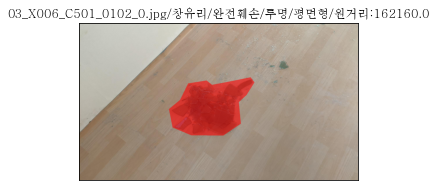

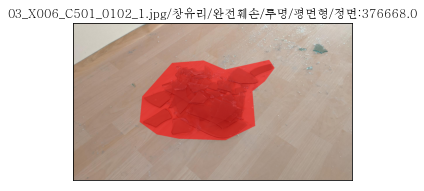

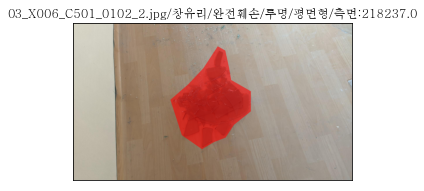

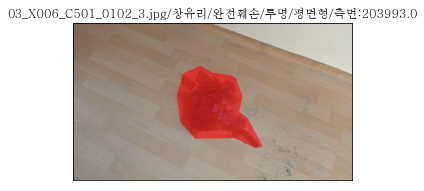

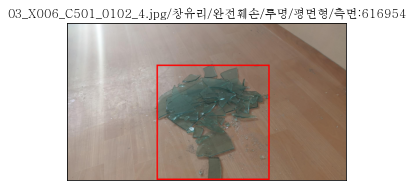

In [7]:
from PIL import Image
from PIL import ImageDraw
import os
import glob
import json
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.image import imread
%matplotlib inline

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/H2MJSM.TTF'
font_name = fm.FontProperties(fname = font_location, size = 40).get_name()
matplotlib.rc('font', family = font_name)

TINT_COLOR = (255, 0, 0)
TRANSPARENCY = .60  # Degree of transparency, 0-100%
OPACITY = int(255 * TRANSPARENCY)

def label_show(path, folder, file, jdata):
    json_path = path+'/'+folder+'/'+file
    jfile = open(json_path, 'rt', encoding = 'UTF-8')
    jdata = json.load(jfile)     
    jfile.close()
    jpg_path = path+'/'+folder+'/'+jdata['FILE NAME']
    bound_cnt = int(jdata['BoundingCount'])
    for k in range(0, bound_cnt):
        if jdata['Bounding'][k]['Drawing'] == 'BOX':
            image = Image.open(jpg_path)
            draw = ImageDraw.Draw(image)
            x1 = int(jdata['Bounding'][k]['x1'])
            x2 = int(jdata['Bounding'][k]['x2'])
            y1 = int(jdata['Bounding'][k]['y1'])
            y2 = int(jdata['Bounding'][k]['y2'])
            area = (x2 - x1) * (y2 - y1) 
            draw.rectangle(((x1, y1), (x2, y2)), outline = (255, 0, 0), width = 10)
            numpy_image = np.array(image)
            plt.rcParams['figure.figsize'] = (5, 5)
            plt.title(jdata['FILE NAME']+'/'+jdata['Bounding'][k]['DETAILS']+'/'+jdata['Bounding'][k]['DAMAGE']+'/'+jdata['Bounding'][k]['TRANSPARENCY']+'/'+jdata['Bounding'][k]['Shape']+'/'+jdata['Bounding'][k]['Direction']+':'+str(area))
            plt.xticks([])
            plt.yticks([])
            plt.imshow(numpy_image)
            plt.show()
        elif jdata['Bounding'][k]['Drawing'] == 'POLYGON':  
            point_cnt = int(jdata['Bounding'][k]['PolygonCount'])
            coord_list = []
            for i in range(point_cnt):
                image = Image.open(jpg_path)
                image = image.convert('RGBA')
                draw = ImageDraw.Draw(image)
                a = list(jdata['Bounding'][k]['PolygonPoint'][i].values())
                x,y = int(a[0].split(',')[0]),int(a[0].split(',')[1])
                coord_list.append((x, y))
            coord_list.append(coord_list[0])
            plus = 0
            minus = 0
            for i in range(len(coord_list) - 1):
                plus += (coord_list[i][0] * coord_list[i+1][1])
                minus += (coord_list[i][1] * coord_list[i+1][0])
            area = math.fabs(0.5 * (plus - minus))
            overlay = Image.new('RGBA', image.size, TINT_COLOR + (0,))
            draw = ImageDraw.Draw(overlay)
            draw.polygon(coord_list, fill = TINT_COLOR + (OPACITY,))
            image = Image.alpha_composite(image, overlay)
            image = image.convert('RGB')
            numpy_image = np.array(image)
            plt.rcParams['figure.figsize'] = (5, 5)
            plt.title(jdata['FILE NAME']+'/'+jdata['Bounding'][k]['DETAILS']+'/'+jdata['Bounding'][k]['DAMAGE']+'/'+jdata['Bounding'][k]['TRANSPARENCY']+'/'+jdata['Bounding'][k]['Shape']+'/'+jdata['Bounding'][k]['Direction']+':'+str(area))
            plt.xticks([])
            plt.yticks([])
            plt.imshow(numpy_image)
            plt.show()


path = r'.'
for folder in sorted(os.listdir(path)):
    for file in sorted(os.listdir(path+'/'+folder)):
        if file.endswith('Json'):
            json_path = path+'/'+folder+'/'+file
            jfile = open(json_path, 'rt', encoding = 'UTF-8')
            jdata = json.load(jfile)
            jfile.close()
            bound_cnt = int(jdata['BoundingCount'])
            for k in range(bound_cnt):
                label_show(path, folder, file, jdata)
